# Tabular Playground - July 2021!!!

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQl2cgl2KQHmykIsg92hEJH9rvyqYuFMJjUMg&usqp=CAU)

**The intention with this notebook is to try out all possible options to perform Regression and Time series analysis, both using Machine learning and Deep learning techniques, to predict the target values of Carbon Monoxide, Benzene, and Nitrogen Dioxide values per day.**

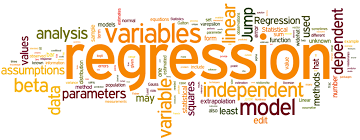

## 1. Data Loading & Basic Analysis

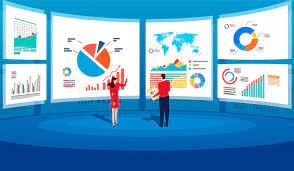

**The idea would be to install some critical libraries, followed by initial data preparation for Regression analysis, and also some extensive EDA!**

In [ ]:
# Quitely install Pycaret Full!!
!pip install pycaret[full] --quiet

In [ ]:
# Install some other libraries quitely. 
!pip install pandas-profiling --quiet
!pip install sweetviz --quiet

In [ ]:
# Load basic libraries. 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from pycaret.regression import *
from pandas_profiling import ProfileReport

# Check all input files. 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Store all the provided data files into 3 different variables. 
sample_submit = pd.read_csv('/kaggle/input/tabular-playground-series-jul-2021/sample_submission.csv')
train = pd.read_csv('/kaggle/input/tabular-playground-series-jul-2021/train.csv')
test = pd.read_csv('/kaggle/input/tabular-playground-series-jul-2021/test.csv')

In [ ]:
# Let's look at the training data once. 
train.head()

In [ ]:
# Let's look at the list of columns
train.columns

In [ ]:
# Let's look into the details about the columns
train.info()

**As of now, we have installed some basic libraries and have loaded all 3 of the provided datasets.**

**Further, we will perform some basi operations like creating new features (from the Date column)**

In [ ]:
# convert the date time column to actual date time rather than being a string
train['date_time'] = pd.to_datetime(train['date_time'])

In [ ]:
# convert the date time column to actual date time rather than being a string
test['date_time'] = pd.to_datetime(test['date_time'])

In [ ]:
# Now create derived variables
train['date_day']=train['date_time'].dt.day
train['date_month']=train['date_time'].dt.month
train['date_year']=train['date_time'].dt.year
train['date_hour']=train['date_time'].dt.hour

In [ ]:
# Now create derived variables
test['date_day']=test['date_time'].dt.day
test['date_month']=test['date_time'].dt.month
test['date_year']=test['date_time'].dt.year
test['date_hour']=test['date_time'].dt.hour

In [ ]:
# Let's look at the data. 
train.head()

In [ ]:
# Checking the sample submission data also. 
sample_submit.head()

**One strategy would be to divide the training data into 3 parts wherein using each part we will try to perform the regression of each of the target variables.**

In [ ]:
# Taking a list of all columns from the training data 
train.columns

In [ ]:
# Creating variables of different column sets so that we can perform Regression separately and later we
# will join them back together as per the required column indexes. 
cols_carbon = ['deg_C', 'relative_humidity', 'absolute_humidity',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide','date_day', 'date_month', 'date_year', 'date_hour']
cols_benzene = ['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_benzene', 'target_nitrogen_oxides',
       'date_day', 'date_month', 'date_year', 'date_hour']
cols_nitrogen = ['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_nitrogen_oxides',
       'date_day', 'date_month', 'date_year', 'date_hour']

In [ ]:
# As per the column variables now we can create the training datasets. 
train_carbon = train[cols_carbon]
train_benzene = train[cols_benzene]
train_nitrogen = train[cols_nitrogen]

In [ ]:
# Just checking one of the columns
train_carbon.head()

**Before we proceed further, let's perform some EDA on the combined dataset.**

In [ ]:
# Creating pandas profiling report. 
train_profile = ProfileReport(train, title="Training Data - Profiling Report", explorative=True)

In [ ]:
# Output the data profiling of the training data. 
train_profile.to_notebook_iframe()

## 2. Initial Modelling (Using PyCaret)

**Using PyCaret, for each of the training datasets, we can try and perform Regression Analysis and see if we get usable results. From here we can also select the best algorithm that works for us in this case.**

![](https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png)

In [ ]:
# creating the carbon monoxide regression 
carbon_regression = setup(train_carbon, target = 'target_carbon_monoxide', silent = True)

In [ ]:
# Comparing all models for Carbon monoxide value prediction. 
best_carbon_model = compare_models()